Pisanie programu w języku Python wersji 3.6 oraz w nowszych, rozpoczynamy od zaimportowania potrzebnych bibliotek. 

In [18]:
# DEKLARACJA BIBLIOTEK
import numpy as np    #obliczenia numeryczne, operacje na macierzach
from math import sin, cos, pi    #funkcje uzyte do wymuszen, wartosc liczby Pi
from scipy.linalg import eigh         #analiza harmoniczna 
from numpy.linalg import inv          #odwracanie macierzy   
from matplotlib import pyplot as plot #rysowanie wykresow


In [19]:
#Dane drogi:

a1 = 0.5
a2 = 0.05


In [20]:
# Funkcje wlasne

# Zdefiniowanie parametrow

# Budowanie macierzy

# Numeryczne calkowanie rownan ruchu

# Wizualizacja wynikow

In [21]:
# Funkcje wlasne
def profil_drogi(a1, a2, T1, T2, v, T, phase):
    #Zwraca funkcje poliharmoniczna na podstawie wektora czasu
    #Input:    a1,T1 - amplituda i okres pierwszej skladowej wymuszenia
    #          a2,T2 - amplituda i okres drugiej skladowej wymuszenia
    #          v     - predkosc pojazdu
    #          ds, dt- krok dla czasu i dla drogi
    #          T     - wektor czasu symulacji
    result = np.zeros(( np.size(T)))     #tworzenie macierzy wynikowej
    #przypisywanie profilu drogi z uwzględnieniem plaskiego poczatku
    
    
    for i in range(np.size(T)- 1 - phase):
        if (T[i] < T1):
            result[i + phase] = 0
        else:
            result[i + phase] = a1* sin(2* pi/T1*T[i]) + a2* sin (2*pi/T2*T[i])
    return result

In [22]:
# Zdefiniowanie parametrow
Mzred = 900
Jzred = 200
k = 12500
b = 200
L1 = 0.45
L2 = 1.35 
dof = 2
vkm = 10.0 #predkosc pojazdu
t0 = 0.0   #poczatek symulacji
tk = 60.0 #koniec symulacji
ds = 0.01 #kork podziału drogi

In [23]:
v = vkm * 1000 / 3600
#print(v)
dt = ds / v
#print(dt)

In [24]:
T = np.arange(t0, tk+dt, dt, dtype = float )
#print(T)
T[-1] = tk
#print(T)
#print(np.size(T))

In [25]:
phase = round ((L2-L1)/ds)
#print(phase)

In [26]:
M = np.array([ [Mzred, 0],[ 0, Jzred] ])
K = np.array( [[4 * k, 0],[0, 2*k * (L1**2) + 2*k * (L2**2)  ]] )
B = np.array( [[4 * b, 0],[0, 2*b * (L1**2) + 2*b * (L2**2)  ]] )

I = np.identity(dof)    #macierz diagonalna z jedynkami

In [27]:
#Zlozenie macierzy
A = np.zeros((2*dof,2*dof))
A[0:2, 0:2] = M
A[2:4, 2:4] = I

C = np.zeros((2*dof,2*dof))
C[0:2, 0:2] = B
C[0:2, 2:4] = K
C[2:4, 0:2] = -I

Y = np.zeros((2*dof,1))
print("Macierz A: \n[M, 0, 0, 0]\n[0, J, 0, 0]\n[0, 0, 1, 0]\n[0, 0, 0, 1]\n:\n\n",A,'\n\n')
print(C)
print(Y)

Macierz A: 
[M, 0, 0, 0]
[0, J, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 1]
:

 [[900.   0.   0.   0.]
 [  0. 200.   0.   0.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]] 


[[ 8.0000e+02  0.0000e+00  5.0000e+04  0.0000e+00]
 [ 0.0000e+00  8.1000e+02  0.0000e+00  5.0625e+04]
 [-1.0000e+00 -0.0000e+00  0.0000e+00  0.0000e+00]
 [-0.0000e+00 -1.0000e+00  0.0000e+00  0.0000e+00]]
[[0.]
 [0.]
 [0.]
 [0.]]


In [28]:
Y1 = np.zeros((T.size,), dtype = float)
Y2 = np.zeros((T.size,), dtype = float)
Y3 = np.zeros((T.size,), dtype = float)
Y4 = np.zeros((T.size,), dtype = float)

In [29]:
Y1 = profil_drogi(a1, a2, 10, 1 , v, T, 0)
#print(Y1)
Y2 = profil_drogi(a1, a2, 10, 1 , v, T,1 * phase )
#print(Y2)
Y3 = profil_drogi(a1, a2, 10, 1 , v, T,2 * phase )
#print(Y3)
Y4 = profil_drogi(a1, a2, 10, 1 , v, T,3 * phase )
#print(Y4)

In [30]:
#Wyznaczenie pochodnych wymuszen
dY1 =np.zeros(Y1.size) 
dY2 =np.zeros(Y1.size)
dY3 =np.zeros(Y1.size)
dY4 =np.zeros(Y1.size)
for i in range(Y1.size-1):
    dY1[i] =( Y1[i+1] - Y1[i] ) / dt
    dY2[i] =( Y2[i+1] - Y2[i] ) / dt
    dY3[i] =( Y3[i+1] - Y3[i] ) / dt
    dY4[i] =( Y4[i+1] - Y4[i] ) / dt   

In [31]:
#Wektor wymuszen
F = np.zeros((2, Y1.size))
#print(F)
iter = 0
for t in T:
    #Dla przemieszczenia pionowego:
    F[0][iter] = b*(dY1[iter] + dY2[iter] + dY3[iter] + dY4[iter])+ k*(Y1[iter] + Y2[iter] + Y3[iter] + Y4[iter] )
    #Dla przechylenia wzdłużnego:
    F[1][iter] = b*(-dY1[iter] * L1 -dY2[iter] * L2 + dY3[iter] * L2 + dY4[iter] * L1) + k*(-Y1[iter] * L1 - Y2[iter] * L2 + Y3[iter]  * L1 + Y4[iter] * L1) 
    iter = iter + 1


In [32]:
#Wektor zerowy do uzupelnienia macierzy wymuszen
Z_2 = np.zeros((dof, 1), dtype = int)
#print(Z_2)

In [33]:
invA = inv(A)
print(invA)
print(invA.shape)
invA=np.squeeze(invA)
C = np.squeeze(C)

[[0.00111111 0.         0.         0.        ]
 [0.         0.005      0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]]
(4, 4)


In [35]:
#Calkowanie numeryczne rownan ruchu
D = np.zeros((2*dof,1))
#print(D)
iter = 0    #liczba iteracji dla wymuszenia

#wyniki 
z = []
fi =[]

for t in T:
    #Wymuszenia dla danej iteracji
    D[0,0] = F[0, iter]
    D[1,0] = F[1, iter]
    #Rownanie
    #e1 = D - C.dot(Y) 
    #print(e1.shape)
    #e1 = np.squeeze(e1)
    #print(e1.shape)
    #print(invA.shape)
    #e2 = invA.dot(e1)
    Y_new = Y + dt * invA.dot( D - C.dot(Y) )
    Y = Y_new
    
    #przypisanie wynikow
    # 0 predkosc z
    # 1 predkosc fi
    # 2 przemieszczenie z
    # 3 przemieszczenie fi
    z.extend(Y[2])
    fi.extend(Y[3])
    iter += 1
    
print(T.size)
print(len(z))
print(len(fi))

16668
16668
16668


In [37]:
%matplotlib qt
fig, ax = plot.subplots()
ax.plot(T, z, label='Z')
ax.plot(T, fi, label='Fi')

ax.axis('equal')
ax.set(xlabel='Czas (s)', ylabel='Przemieszczenie pionowe (m)',
       title='Profil drogi')
ax.grid()
fig.savefig("test.png")
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plot.show()

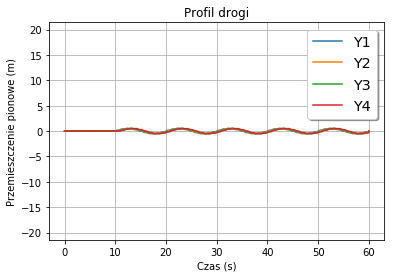

In [123]:
fig, ax = plot.subplots()
ax.plot(T, Y1, label='Y1')
ax.plot(T, Y2, label='Y2')
ax.plot(T, Y3, label='Y3')
ax.plot(T, Y4, label='Y4')
ax.axis('equal')
ax.set(xlabel='Czas (s)', ylabel='Przemieszczenie pionowe (m)',
       title='Profil drogi')
ax.grid()
fig.savefig("test.png")
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plot.show()

In [124]:
iterat = 0
A_inv = inv(A)

In [19]:
for t in T:
    Y_new = Y + dt * A_in

NameError: name 'Y' is not defined